<a href="https://colab.research.google.com/github/Ysop1264/TMDLWeek2/blob/main/TMDL_2024_25_Assignment_3%2C_Ans_636866.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Turing Machine and Deep Learning 2023

## Assignment Unupervised ML

This notebook is meant for you to review and reflect on the content of Lecture 3, which was mainly about unsupervised learning problems. As with last week, this notebook should not be too much quantitative work (lines of code) but keep in mind that running this notebook may take a longer time than you may be used to for python programs (*training good models take time!*)

### Handing in your Assignment

Git is an invaluable resource to researchers and developers, and thus for this course, all course material will be (additionally) shared on GitHub. Though there is a tiny bit of a learning curve, this is worth the effort. To hand in your assignment (applicable to all weeks):

1. Create a folder called "Week 2" and copy this notebook and any other files or data that may be needed.
2. Finish the notebook and commit and push regularly. Your final commit before the deadline will be graded.


### Grading

Each one of the (sub-)questions below will be graded either 0 (insufficient), 1 (sufficient) or 2 (good). If $N$ is the number of sub-questions, and $p_i$ is your score for sub-question $i$, your total grade $G$ for this assignment is:
$$G=\frac{1}{2 N}\sum_{i=0}^{N}p_i$$

In [1]:
# load common libraries
import numpy as np                 # maths
import matplotlib.pyplot as plt    # plotting
import pandas as pd                # data manipulation
from tqdm import tqdm              # loading bar
from time import perf_counter      # timer

# Q1 Loading and preprocessing data

In this repository, you should find a file called `tmdb_5000_movies.csv` which is information from a subset of movies on The Movie Database.

### Q.1.1
Use pandas to read in the csv file (refer to [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) if you're unfamiliar).

In [2]:
df = pd.read_csv("/content/tmdb_5000_movies.csv")
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

View information about the dataset including datatypes and null values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

**Q.1.1.2** What columns have null values above? How would you be able to estimate the missing values?

homepage, overview, release_date, runtime, and tagline columns have missing values. Especially, homepage and taglines which have a substantial amount - 3091 and 844 respectively. But, since htese aren't neccessary for our analysis, they can filled with "no overview" and "no tagline" or just be dropped so as to have perfectly clean data.
The overview column has 3 missing row values, these can be filled with something like "no overview available" as it is also unlikely to impact final results, considering size of the dataset.
The missing release date (only 1 value) can be estimated by looking for alternative soruces of info or estimating based on release year. For the 2 missing runtimes, they can be fillled with median values of runtime within their genre as a decent estimate.

### Q1.2
For this notebook, we're only interested in a few columns, specifically title, overview and genres. Set df to only contain those columns.

In [4]:
df = df[["title", "overview", "genres"]]
df.info() # print out df info to verify

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     4803 non-null   object
 1   overview  4800 non-null   object
 2   genres    4803 non-null   object
dtypes: object(3)
memory usage: 112.7+ KB


### Q1.3
We see that some movies do not have an overview. Drop them from the table and reset the index (set `drop=True`).

In [5]:
df = df.dropna(subset=["overview"]) # drop na values
df = df.reset_index(drop=True) # reset index
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     4800 non-null   object
 1   overview  4800 non-null   object
 2   genres    4800 non-null   object
dtypes: object(3)
memory usage: 112.6+ KB


# Q2 One-hot encodings
The following code processes the genres (which you see above are list of dictionaries) and encodes them into one-hot labels.

Remember, since we cannot do maths on text strings, we must change these words to numbers. Here, we create one-hot encodings for the genres. Assume we have three genres $[G_1, G_2, G_3]$. If a movie $M_1$ is tagged with genre $G_1$, the encoding is $[1,0,0]$. If another movie $M_2$ is tagged with $G2$, the encoding becomes $[0,1,0]$. Other encodings are possible as well, but one-hot encoding quite common and useful for many other tasks. In this case, if a movie is tagged with more than one genre, we'll just take a random one and encode that into a one-hot label.

### Q2.1 Processing genres

Finish the following code that processes genres into one-hot encodings.

In [6]:
np.random.seed(0)

def process_genre_string(gs):
    """ Processes genres into a single item from a list"""
    gs = eval(gs)
    gs = [x['name'] for x in gs]
    genre = "Unknown"
    if gs:
        genre = np.random.choice(gs) # choose random entry
    return genre

# TODO: Fill in
def encode_labels(label, unique_labels):
    """ Encodes text labels into a one-hot encoded list
        with possibly more than one one-hot per list.
        :param label: the label you want to one-hot encode
        :unique_labels: the vocabulary
    """
    out = np.zeros(len(unique_labels))
    index = unique_labels.index(label)
    out[index] = 1
    return out

# save genres
processed_genres = []
for index, row in df.iterrows():
    processed_genres.append(process_genre_string(row["genres"]))

# sort and remove duplicates to get vocabulary
unique_genres = sorted(list(set(processed_genres)))

# add to dataframe as new column
df["proc_genres"] = processed_genres

# one-hot encode genres
enocded_labels = []
for index, row in tqdm(df.iterrows(), total=len(df)):
    enocded_labels.append(encode_labels(row["proc_genres"], unique_genres))

df["one_hot_genres"] = enocded_labels

100%|██████████| 4800/4800 [00:00<00:00, 17563.72it/s]


Verify that one-hot encodings are indeed as expected

In [7]:
df["one_hot_genres"][0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

### Q2.2 Processing Overviews
Next, we process the overviews. First, we remove all punctuation for the sake of simplicity and change each overview to use only lowercase. Then we need to see how long the overviews are in terms of numbers of words. We can do this with a histogram.

**Q2.2.1** Finish the following code

100%|██████████| 4800/4800 [00:00<00:00, 14275.79it/s]


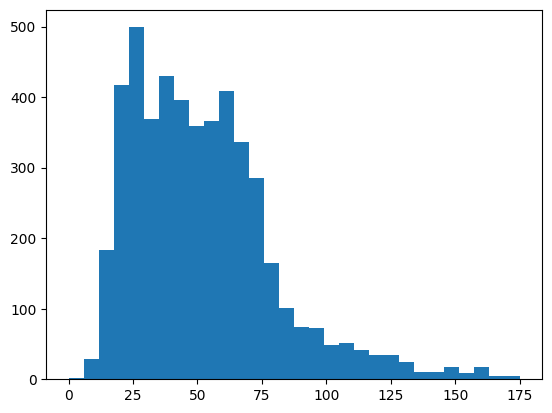

In [8]:
import re
def remove_punctuation(text):
    """ Only retains letters, numbers, underscores and whitespace """
    pattern = r'[^\w\s]'
    return re.sub(pattern, '', text)

processed_overviews = []

# loop over df, remove punctuation, make words lowercase and add it to a new column
for index, row in tqdm(df.iterrows(), total=len(df)):
    overview = row["overview"]
    overview = remove_punctuation(overview)
    overview = overview.lower()
    overview = overview.split()
    processed_overviews.append(overview)
df["proc_overview"] = processed_overviews

# get the word lengths of each overview and store it in a list
overview_lens = []
for overview in processed_overviews:
    overview_lens.append(len(overview)) #Already split earlier

# for the sake of simplicity, add these values as a column to the df
df["overview_len"] = overview_lens
plt.hist(overview_lens, bins=30)
plt.show()

**Q2.2.2** What is the shortest overview? What is the longest? In the next step, we need to decide on a standard length of all overviews -- this means dropping overviews less than some value, and truncating longer ones. What length would you choose to minimize the number of movies dropped and maximize the information (words) stored in the overviews?

Shortest overview length: 0
Longest overview length: 175


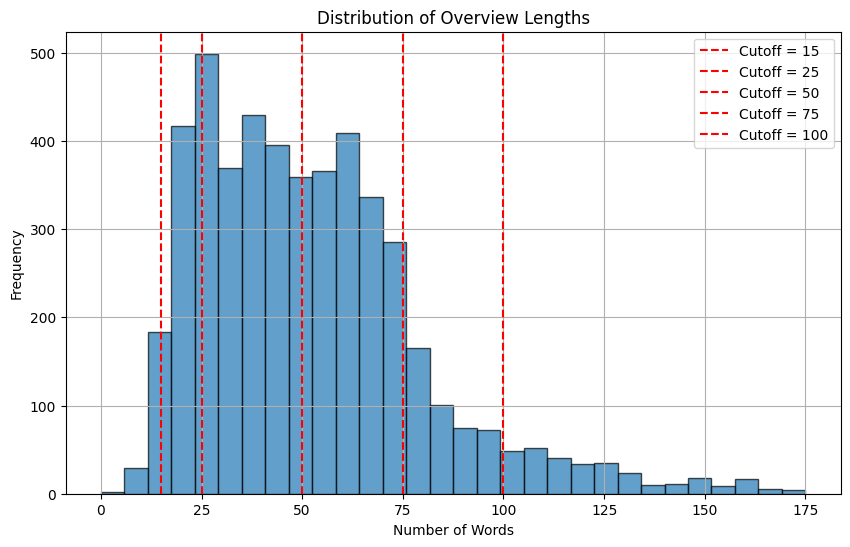

Cutoff =  15 , Kept: 4707 , Dropped:   93 , % Kept: 98.06%
Cutoff =  25 , Kept: 4086 , Dropped:  714 , % Kept: 85.12%
Cutoff =  50 , Kept: 2303 , Dropped: 2497 , % Kept: 47.98%
Cutoff =  75 , Kept:  764 , Dropped: 4036 , % Kept: 15.92%
Cutoff = 100 , Kept:  308 , Dropped: 4492 , % Kept: 6.42%


In [9]:
print("Shortest overview length:", df["overview_len"].min())
print("Longest overview length:", df["overview_len"].max())

plt.figure(figsize=(10, 6))
plt.hist(df["overview_len"], bins=30, edgecolor='black', alpha=0.7)

cutoffs = [15, 25, 50, 75, 100]
# Trying candidate cutoffs
for cutoff in cutoffs:
    plt.axvline(cutoff, color='red', linestyle='--', label=f"Cutoff = {cutoff}")

plt.title("Distribution of Overview Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

for cutoff in cutoffs:
    kept = df[df["overview_len"] >= cutoff].shape[0]
    dropped = df.shape[0] - kept
    print(f"Cutoff = {cutoff:>3} , Kept: {kept:>4} , Dropped: {dropped:>4} , % Kept: {kept / df.shape[0] * 100:.2f}%")

The shortest overview is 15 words (although dropna was used, maybe there was an empty string input). The longest overview is 175 words. Based on the above data (graph and values), we see that a cutoff of about 25 words is a sweet spot where we minimise the size of the overviews whilst not losing too much data.

### Q2.2.3
Let's choose overviews of length 15 words. What this means is we need to discard movies that have overviews less than 15 (there are other ways of dealing with it, but this should be fine for now) and truncate the higher ones to the first 15 words.

In [10]:
token_len = 15 # number of words
# only select rows where overview len is more than or equal to token_len
df = df[df["overview_len"] >= token_len]
df = df.reset_index(drop=True)

# split each proc_overview into a list of words, select the first token_len words,
# and add the list of words back into df["proc_overview"]
df["proc_overview"] = df["proc_overview"].apply(lambda x: x[:token_len])

# print to verify
print(df["proc_overview"].head())

0    [in, the, 22nd, century, a, paraplegic, marine...
1    [captain, barbossa, long, believed, to, be, de...
2    [a, cryptic, message, from, bonds, past, sends...
3    [following, the, death, of, district, attorney...
4    [john, carter, is, a, warweary, former, milita...
Name: proc_overview, dtype: object


### Q2.2.3 Finding the vocabulary length

In order to one-hot encode words, we need to find how many words there are in total, just like in the case of genres. Get all the words, remove duplicates, and sort. Find and print the length of your vocabulary.

In [11]:
# hint: store all words for all movies in a set, change it to a list and sort
vocab = set()
for overview in df["proc_overview"]:
    vocab.update(overview)

vocab = sorted(list(vocab))

vocab_len = len(vocab)
print(vocab_len)

12493


### Q2.2.4 Encoding the labels

In the case of genres, we one-hot encoded the outputs by taking a single random genre. However, an alternative method is to add up the one-hot encodings to form some kind of histogram. For example, if we have an overview "a brown dog", and our vocab is \[a brown, big, cabbage, dog, goat, cow, turkey\], the one-hot vector would be \[1,1,0,0,1,0,0,0\]. If our overview is "a big brown dog", the one-hot vector would be \[1,1,1,0,1,0,0,0\]. If our overview is "a big big brown dog", the one-hot vector would be \[1,1,2,0,1,0,0,0\]. You can use the `encode_labels` function that you defined earlier.

In [12]:
# this code is just a hint, if you want you can do it as you please
# as long as the output remains the same

# Create a mapping from word to index
match_count = 0
vocab_to_index = {word: i for i, word in enumerate(vocab)}

encoded_labels = []
for index, row in tqdm(df.iterrows(), total=len(df)):
    vector = np.zeros(vocab_len)
    for word in row["proc_overview"]:
        if word in vocab_to_index:  # Safe check
            vector[vocab_to_index[word]] = 1  # Set presence of word
            match_count += 1
        else:
            print(f"Word not found in vocab: {word}")
    encoded_labels.append(vector)


df["one_hot_overview"] = encoded_labels
df["one_hot_overview"]

100%|██████████| 4707/4707 [00:00<00:00, 4743.94it/s]


,one_hot_overview
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...
4702,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4703,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4704,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4705,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


**Q2.2.5** Each vector is a vector of floating point (64-bit) numbers. Assuming each float takes up exactly 16-bytes, how many bytes does this take to store (theoretically)?

In [13]:
num_rows = len(df)

#vocab_len defined earlier
total_bytes = num_rows * vocab_len * 16
print(f"Theoretical storage: {total_bytes:,} bytes")


Theoretical storage: 940,872,816 bytes


We know that total bytes is the product of number of vectors and the length of each vector times the space taken by each float. In our case, this gives 940872816 bytes

# Q3 Principal Component Analysis

**Q3.1** Using the overview encoded into one-hot encodings, perform PCA and plot this into a 2-D image as a scatter plot.

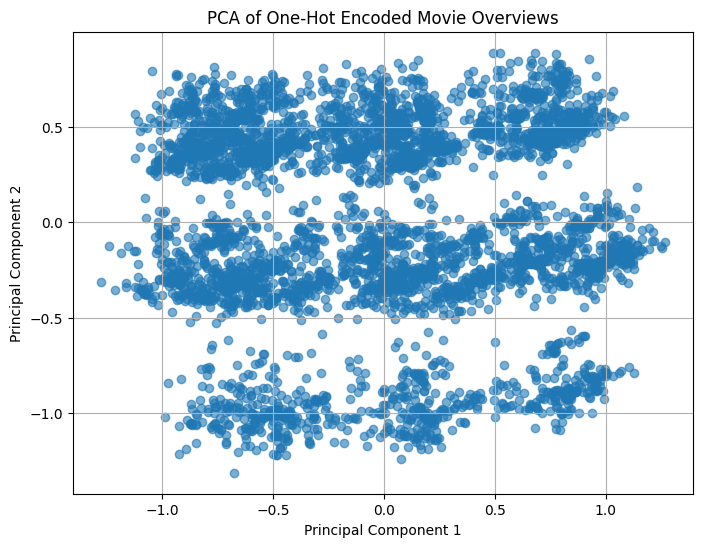

In [14]:
# import PCA decomposition class from sklearn
from sklearn.decomposition import PCA

# we did exactly this in the lecture notebook
encoded_labels = np.array(df["one_hot_overview"].tolist())

pca = PCA(n_components=2)
labels_pca = pca.fit_transform(encoded_labels)

plt.figure(figsize=(8, 6))
plt.scatter(labels_pca[:, 0], labels_pca[:, 1], alpha=0.6)
plt.title("PCA of One-Hot Encoded Movie Overviews")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

**Q3.2** Do you see any interpretable structure in the above plot ("interpretable" $\rightarrow$ the patterns are explainable).

There is structure but it is not interpretable. The points are arranged in several horizontal layers or stripes across the y-axis (PC2). It is not random and could be explained as a sign that PCA is picking up on repeated structures or artifacts in the data.
The points also aren't completely uniform suggesting that some overviews may use similar words (which intuitively makes some sense)
But overall, there is no clear way to interpret the structure

**Q3.3** Quantify how much variance information a 2D PCA projection loses for this dataset.

In [15]:
explained = pca.explained_variance_ratio_
total_explained = explained.sum()
info_loss = 1 - total_explained

print(f"Variance retained in 2D: {total_explained:.4f}")
print(f"Variance lost (information loss): {info_loss:.4f}")

Variance retained in 2D: 0.0513
Variance lost (information loss): 0.9487


The current 2D PCA projection only keeps about 5% of the total information, meaning it loses approximately 95% of the total information.

**Q3.4** Plot a line graph where the y-axis is cumulative explained variance ratio and the x-axis is the number of PCA components.

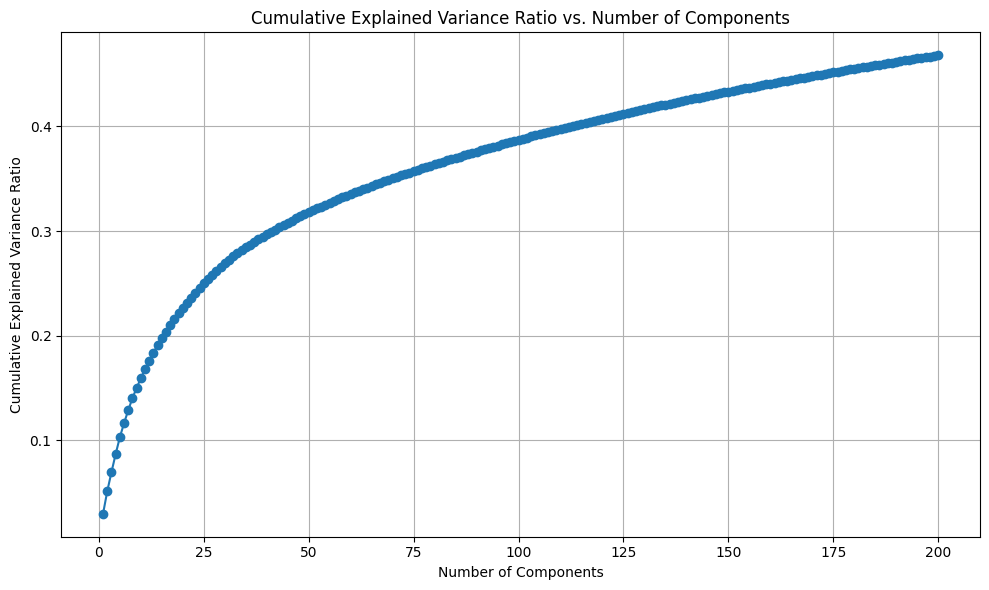

In [16]:
# Set up PCA object with the desired number of components
max_components = 200
pca = PCA(n_components=max_components)

encoded_arr = np.array(df["one_hot_overview"].tolist())

# fit transform one_hot_overview encodings
labels_pca = pca.fit_transform(encoded_arr)
# get explained variance ratio from object, store it in a list
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_ratio = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_components + 1), cumulative_explained_ratio, marker='o', linestyle='-')
# set up y label, x label, title
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.title("Cumulative Explained Variance Ratio vs. Number of Components")
plt.grid(True)
plt.tight_layout()
plt.show()

**Q3.5** How many principal components do you need in order to explain 80% of the total variance in the data?

Note: don't just estimate it by eye, write some code to compute it for you.

In [17]:
# your code answer here
pca = PCA(n_components=encoded_arr.shape[0])
pca.fit(encoded_arr)
cumulative_explained_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_explained_ratio >= 0.8) + 1

print(f"No. of components to explain 80% variance: {n_components}")

No. of components to explain 80% variance: 1394


According to the code the number of components required is 1394

**Q3.6** Using the number of dimensions you found in Q3.5, fit and transform your overview encodings using PCA and add it to a new column called `overview_pca` in the dataframe.

In [18]:
n_dims = 1394
pca = PCA(n_components=n_dims)
labels_pca = pca.fit_transform(encoded_arr)
df["overview_pca"] = labels_pca.tolist()

# Q4 K-Means Clustering

**Q4.1** Cluster the movies based on the features that were extracted via PCA in the last step. Set $K=20$. Add the predicted cluster into the dataframe as a new column called `cluster_kmeans`. Print out the elements of cluster number 0 from the dataframe.

In [19]:
# import KMeans class
from sklearn.cluster import KMeans

X_pca = np.array(df["overview_pca"].tolist())
# Perform K-means clustering
kmeans = KMeans(n_clusters=20)
# fit model
kmeans.fit(X_pca)

y_preds = kmeans.predict(X_pca) # get predictions
df["cluster_kmeans"] = y_preds # set predictions

# print out elements of cluster 0
cluster_0 = df[df["cluster_kmeans"] == 0]
cluster_0

,title,overview,genres,proc_genres,one_hot_genres,proc_overview,overview_len,one_hot_overview,overview_pca,cluster_kmeans
3,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[following, the, death, of, district, attorney...",65,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.6802807403175961, -0.21009813711940045, -0....",0
5,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[the, seemingly, invincible, spiderman, goes, ...",44,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.9171723980813984, -0.25438244173458424, -0....",0
11,Quantum of Solace,Quantum of Solace continues the adventures of ...,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",Adventure,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[quantum, of, solace, continues, the, adventur...",60,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.937327459882744, -0.21511945112795802, -0.3...",0
21,Robin Hood,When soldier Robin happens upon the dying Robe...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[when, soldier, robin, happens, upon, the, dyi...",44,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.6033657635625762, -0.17656492479350924, -0....",0
26,Captain America: Civil War,"Following the events of Age of Ultron, the col...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",Science Fiction,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[following, the, events, of, age, of, ultron, ...",47,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.9737558522227107, -0.24133986412459205, -0....",0
...,...,...,...,...,...,...,...,...,...,...
4664,Bending Steel,"The Cyclone, The Freakshow, The Mermaid Parade...","[{""id"": 99, ""name"": ""Documentary""}]",Documentary,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[the, cyclone, the, freakshow, the, mermaid, p...",73,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.3461827621621189, -0.3778882913148289, -0.2...",0
4673,The Last Waltz,Martin Scorsese's rockumentary intertwines foo...,"[{""id"": 99, ""name"": ""Documentary""}, {""id"": 104...",Documentary,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[martin, scorseses, rockumentary, intertwines,...",31,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.2908536712084159, -0.37243633124712244, -0....",0
4678,Her Cry: La Llorona Investigation,"Crew of ""Paranormal Legends"" went to film thei...","[{""id"": 27, ""name"": ""Horror""}]",Horror,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[crew, of, paranormal, legends, went, to, film...",33,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.7118478681748283, -0.27639793485672454, -0....",0
4683,Manito,"Fifteen years ago, their Washington Heights ne...","[{""id"": 18, ""name"": ""Drama""}]",Drama,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[fifteen, years, ago, their, washington, heigh...",107,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.9807540335077203, -0.34437090571829104, -0....",0


**Q4.2** Does this clustering seem alright to you (based on your movie watching history)? Are there movies that go well together and movies that don't?

The clustering is relatively coherent, especially for superhero, action, and adventure films — movies like The Dark Knight Rises, Spider-Man 3, Captain America: Civil War, and Quantum of Solace clearly belong together. They share common themes like high-stakes conflict, large-scale battles, and fast-paced narratives.

However, some movies like The Man from Earth, Happy Christmas, and Her Cry: La Llorona Investigationfeel out of place in this otherwise action-heavy cluster. These films differ drastically in tone, pace, and genre.

So, while the core of the cluster makes sense — particularly for fans of superhero or high-energy action — the inclusion of horror, drama, and indie films reveals that the clustering still has some noise. Overall, it is a decent grouping, but not perfect.

**Q4.3** Now, we'll figure out whether using the elbow method is right for this dataset. Plot a loss (using `kmeans.inertia_`) versus cluster size plot. Is there an elbow that you see clearly? What cluster size would you choose?

Yes, there is a steep drop from k = 2 to k = 10, after which reducing till 13 or 14 gives significant drop but beyond that is diminishing results. I think here, k = 13 would be the sweet spot.

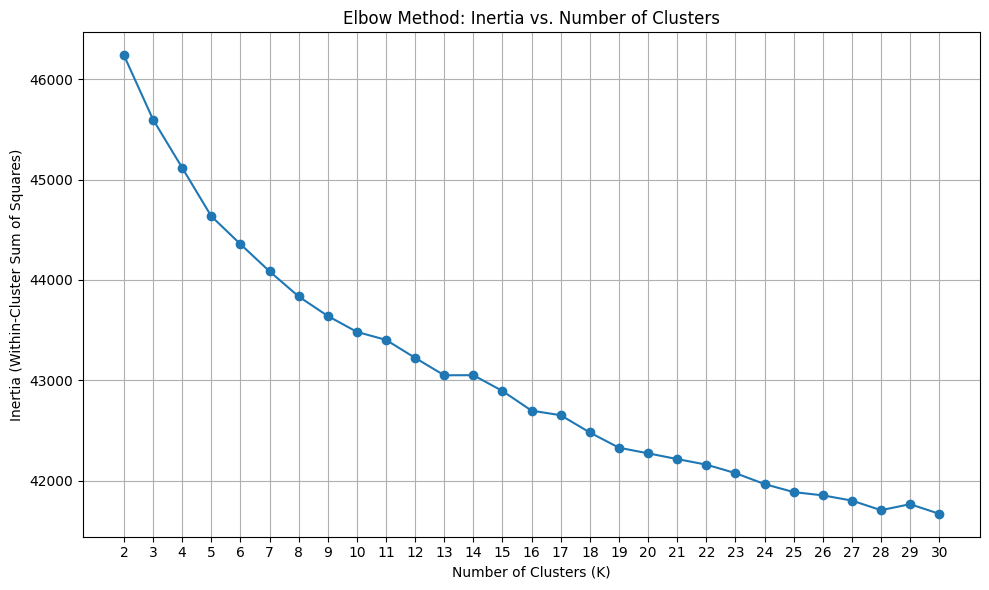

In [20]:
# your code answer here
inertias = []
K_range = range(2, 31)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_pca)
    inertias.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method: Inertia vs. Number of Clusters")
plt.grid(True)
plt.xticks(K_range)
plt.tight_layout()
plt.show()

# Q5 Gaussian Mixture Models

**Q5.1** As with the K-means above, cluster the movies based on the features that were extracted via PCA in a previous step. Set $K=20$. Add the predicted cluster into the dataframe as a new column called `cluster_gmm`. Print out the elements of a single cluster of your choice from the dataframe.

In [21]:
# Your code answer here
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=20)
gmm.fit(X_pca)

gmm_preds = gmm.predict(X_pca)

df["cluster_gmm"] = gmm_preds

cluster_id = 0
cluster_data = df[df["cluster_gmm"] == cluster_id]
cluster_data

,title,overview,genres,proc_genres,one_hot_genres,proc_overview,overview_len,one_hot_overview,overview_pca,cluster_kmeans,cluster_gmm
7,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[when, tony, stark, tries, to, jumpstart, a, d...",69,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.9554686208636076, -0.2801457972075665, -0....",5,0
27,Battleship,"When mankind beams a radio signal into space, ...","[{""id"": 53, ""name"": ""Thriller""}, {""id"": 28, ""n...",Science Fiction,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[when, mankind, beams, a, radio, signal, into,...",93,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.4520717189768371, 0.4266354842806628, 0.68...",10,0
35,Transformers: Revenge of the Fallen,Sam Witwicky leaves the Autobots behind for a ...,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",Adventure,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[sam, witwicky, leaves, the, autobots, behind,...",32,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.13567533750655275, 0.4605285083057133, -0....",10,0
89,The Polar Express,When a doubting young boy takes an extraordina...,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 16, ""...",Adventure,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[when, a, doubting, young, boy, takes, an, ext...",35,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.2671998299860212, 0.43324600152218007, -0....",10,0
96,Shin Godzilla,From the mind behind Evangelion comes a hit la...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Drama,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[from, the, mind, behind, evangelion, comes, a...",81,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.107242257739069, 0.3278562310438062, -0.232...",10,0
...,...,...,...,...,...,...,...,...,...,...,...
4586,The Business of Fancydancing,"Seymour Polatkin is a successful, gay Indian p...","[{""id"": 10402, ""name"": ""Music""}, {""id"": 18, ""n...",Drama,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[seymour, polatkin, is, a, successful, gay, in...",32,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.7970891657863293, 0.5840369065803729, -0.1...",4,0
4637,Cheap Thrills,"Recently fired and facing eviction, a new dad ...","[{""id"": 18, ""name"": ""Drama""}, {""id"": 35, ""name...",Comedy,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[recently, fired, and, facing, eviction, a, ne...",31,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.8786999773890335, -0.3782873674951546, 0.1...",5,0
4641,Echo Dr.,"When their home security system malfunctions, ...","[{""id"": 53, ""name"": ""Thriller""}, {""id"": 28, ""n...",Science Fiction,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[when, their, home, security, system, malfunct...",26,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.8750215680845167, 0.2680837453056167, -0.5...",10,0
4660,Hayride,A college student returning home for Halloween...,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 27, ""n...",Horror,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[a, college, student, returning, home, for, ha...",25,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-1.087070331228187, 0.4975079901920948, -0.59...",7,0


**Q4.2** Does this clustering seem alright to you (based on your movie watching history)? Are there movies that go well together and movies that don't? How does this compare to K-Means Clustering?

This cluster contains several movies with a clear sci-fi, action, or large-scale conflict theme, such as Avengers: Age of Ultron, Battleship, Transformers: Revenge of the Fallen, and Shin Godzilla. These films are visually intense, feature global stakes, and lean heavily into the science fiction or action genres.

However, the cluster also includes some tonally or thematically different movies, like The Polar Express, Cheap Thrills, and Shanghai Calling. These do not quite fit the action-packed, futuristic vibe shared by the others.

KMeans Cluster 0 maintains a reasonably strong theme of sci-fi and action among its central titles, though it does begin to blur at the edges with some mismatched genres. On the other hand, GMM Cluster 0 appears even more mixed — containing not just sci-fi, but also comedy, drama, and thriller elements with less genre cohesion overall.

Therefore, in this case, KMeans provides a more interpretable and genre-aligned clustering, particularly useful for content-based recommendations, while GMM may be better at capturing soft overlaps between genres — though at the cost of clarity.

**Q4.3** Let's check out the size of the clusters. Create a double bar plot (**as you did in the last assignment**) showing the different sizes of the clusters.

*Hint: you may want to consider `df.value_counts()` if you're unfamiliar.*

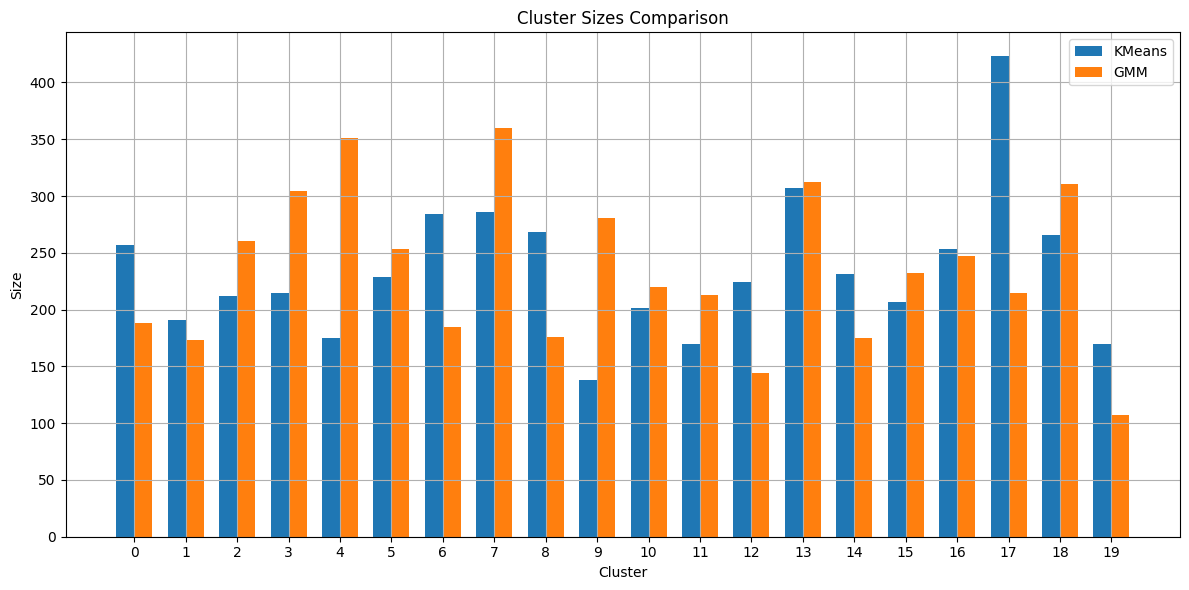

In [22]:
kmeans_counts = df["cluster_kmeans"].value_counts().sort_index()
gmm_counts = df["cluster_gmm"].value_counts().sort_index()

clusters = sorted(set(kmeans_counts.index).union(set(gmm_counts.index)))

kmeans_sizes = [kmeans_counts.get(cluster, 0) for cluster in clusters]
gmm_sizes = [gmm_counts.get(cluster, 0) for cluster in clusters]

# Create an array for the x-axis positions
x = np.arange(len(clusters))
width = 0.35

# Plotting the bars
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, kmeans_sizes, width, label='KMeans')
plt.bar(x + width/2, gmm_sizes, width, label='GMM')

# Add labels, title, and legend
plt.xlabel('Cluster')
plt.ylabel('Size')
plt.title('Cluster Sizes Comparison')
plt.xticks(x, clusters)
plt.legend()
plt.grid(True)
plt.tight_layout()
# Show the plot
plt.show()

**Q4.4** Do you see a significant difference in the sizes of the clusters? Which is more uniform? Any thought on why?

Yes, there is a significant difference in cluster sizes between KMeans and GMM. KMeans produces more uniform cluster sizes, with most clusters containing a similar number of movies. In contrast, GMM shows greater imbalance, where some clusters contain significantly more data points than others.

This occurs because GMM allows for soft, overlapping clusters and assigns data points based on probability density functions. As a result, certain Gaussian components may absorb more data if they better fit the underlying distribution — leading to uneven cluster sizes.

# Q6: A very simple recommender system

One useful thing that clustering is often used for (though at a much greater complexity) is in **recommender systems**. These are systems with users and items (movies, files, documents, etc.), where new items are shown to the user based on what they've previously interacted with, and possibly also on the behaviour of other users.

**Q6.1** Assume your dentist has just watched the movie Avatar and asks you for a recommendation. Lucky for you, you just finished this assignment. Using the cluster indices of the movie Avatar for both the K-means and GMM methods, print out suggestions for new movies.

In [23]:
prev_watch = "Avatar"

# Find the row for Avatar
avatar_row = df[df["title"].str.lower() == prev_watch.lower()]

# Making sure it exists
if not avatar_row.empty:
    # find what cluster index Avatar falls into for k-means
    cluster_kmeans = avatar_row["cluster_kmeans"].values[0]
    # find what cluster index Avatar falls into for gmm
    cluster_gmm = avatar_row["cluster_gmm"].values[0]

    print(f"Avatar is in KMeans cluster {cluster_kmeans}")
    print(f"Avatar is in GMM cluster {cluster_gmm}")

    # Get similar movies from each cluster (excluding Avatar itself)
    rec_kmeans = df[(df["cluster_kmeans"] == cluster_kmeans) & (df["title"] != prev_watch)]
    rec_gmm = df[(df["cluster_gmm"] == cluster_gmm) & (df["title"] != prev_watch)]

    #print out similar movies
    print("\n Recommendations based on KMeans cluster:")
    print(rec_kmeans["title"].head(10).to_string(index=False))

    print("\n Recommendations based on GMM cluster:")
    print(rec_gmm["title"].head(10).to_string(index=False))
else:
    print("Movie 'Avatar' not found in the dataset.")

Avatar is in KMeans cluster 11
Avatar is in GMM cluster 5

 Recommendations based on KMeans cluster:
        Jupiter Ascending
The Sorcerer's Apprentice
         The Green Hornet
               Real Steel
          Minority Report
            Casino Royale
                    Dredd
            Mars Attacks!
   Walking With Dinosaurs
        Battlefield Earth

 Recommendations based on GMM cluster:
               The Golden Compass
                          Titanic
                  The Jungle Book
        The Sorcerer's Apprentice
              The Matrix Reloaded
                             Thor
                          Beowulf
Final Fantasy: The Spirits Within
                   Happy Feet Two
                         Megamind


**Q6.2** Are any of the two recommender systems any good? Would you use them if your real dentist asks for a movie suggestion?

Between the two, KMeans produced slightly better recommendations for someone who just watched Avatar. It suggested other sci-fi/action-heavy blockbusters with similar tones and visual spectacle — such as Jupiter Ascending, Minority Report, Real Steel, and Casino Royale. These films share common elements like futuristic settings, high-stakes plots, and visual effects-driven storytelling.

GMMs recommendations were more diverse in tone and genre. While it did include relevant picks like The Matrix Reloaded, Thor, and Final Fantasy: The Spirits Within, it also suggested less related titles such as Titanic, The Jungle Book, and Happy Feet Two. These do not align as clearly with Avatar's sci-fi/action identity, which may make the recommendations feel less targeted.

Overall, KMeans offered more consistent and genre-aligned suggestions. While neither system is flawless, KMeans was closer to what I would personally recommend to my dentist after watching Avatar, especially for staying within the sci-fi/action blockbuster vibe.

**Q6.3** How would you try making the recommender systems better?

I would use more features, like genres, cast or user ratings. Instead of recommending the top cluster, I could take advantage of GMMs probability of each cluster and pull top weighted suggestions from that.
I would use better text representations as 15 word one-hot-encoding seems a little shallow. However, removing stopwords to clean the vectors and stemming could further help. Since, movies are very sentiment-driven, I could als use sentiment analysis based on any tone or emotion shown in overview.
I could also use collaborative filtering and hybrid approaches to further refine the recommender system.

**Q6.4** Say your dentist likes the movies you suggested and has watched a few more since you met him last. How would you incorporate this fact (recommendation based on multiple movies) into your suggestions?

We can use cosine similarity and use content-based filtering. After assigning a similarity score, we can rank these scores and then recommend the most similar movies that the user (dentist) has not seen.

**Q6.5** An alternative method for recommendations is to use your encoded movie-feature vectors (in this case your overview+PCA vector) in order to find out what movie may be most similar to the current one. In the case of K-Means and GMMs, "similarity" referred to Euclidean distance. However, in this exercise, we will use *cosine similarity*, which is another very common similarity measure, and is related to the angle between two vectors. It is defined as:

$$sim(v_1, v_2)=\frac{v_1\cdot v_2}{||v_1||\cdot||v_2||}$$

Where $v_1$ and $v_2$ are vectors and the operator $||\cdot||$ is the norm of the vector. The function ranges from $[-1,1]$ (where 1 means that the vectors point in the same direction).

Define an appropriate function `cosine_sim`. Add a column called `cos_sim_to_avatar` in the df and print out the head of the df, sorted by the similarity. What movies would you recommend now? Is this better than the clustering methods?

In [24]:
def cosine_sim(v1, v2):
  v1 = np.array(v1)
  v2 = np.array(v2)
  return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

# get overview_pca encoding of previously watched film
prev_watch_enc = df[df["title"].str.lower() == prev_watch.lower()]["overview_pca"].values[0]

sims = [] # set up place to store similarities
for i, row in df.iterrows():
  sim_score = cosine_sim(prev_watch_enc, row["overview_pca"])
  sims.append(sim_score)

df["cos_sim_to_avatar"] = sims
df = df.sort_values(by="cos_sim_to_avatar", ascending=False) # sort df

# Print top 10 most similar (excluding Avatar itself)
recommendations = df[df["title"].str.lower() != prev_watch.lower()]
print(recommendations[["title", "cos_sim_to_avatar"]].head(10))

                 title  cos_sim_to_avatar
2900      Barry Lyndon           0.363238
1590             Hanna           0.343665
552            Jarhead           0.335442
1003          Child 44           0.334555
3318           Warlock           0.329599
1445          Biutiful           0.328940
2779  The Golden Child           0.325508
769          Supernova           0.320339
273      Casino Royale           0.317815
4329        Frat Party           0.313102


While cosine similarity offers a more direct recommendation method, the results in this case are less relevant than those generated via clustering.

The top matches included dramas and thrillers, which do not align with Avatar’s sci-fi, fantasy, and adventure elements.

This suggests that cosine similarity works best when paired with more semantically rich text representations.

For now, KMeans provided more thematically consistent and genre-relevant recommendations, making it a better choice for this dataset.

# Q7 Unsupervised Learning as a Tool

At the end of this brief forey into natural language processing, we will end with an interesting task: can a machine predict the genre of a movie based purely on the first 10 words of its overview?

First, the following cell shuffles the dataset and splits it into a training and test set. The random seed and random state ensure that the train and test samples are the same for you all the time, and *probably* your classmates too. You can verify this by printing out the dataframes and checking it for yourself.

In [25]:
np.random.seed(0)
n_train = int(0.8*len(df))
df_shuffle = df.sample(frac=1, random_state=42).reset_index(drop=True)
df_train = df_shuffle[:n_train].reset_index(drop=True)
df_test = df_shuffle[n_train:].reset_index(drop=True)
print(len(df_train), len(df_test))

3765 942


## Train, test, evaluate

Using a supervised learning method of your choice, try predicting the genre of a movie from the overview. The way you preprocess your data is up to you, and you can take inspiration from the above exercises (e.g. PCA on the one-hot encodings as input, one-hot label encodings as output). There are a number of hyperparameters you can choose depending on your selected method (number of words in your overview, number of dimensions, number of clusters, hyperparameters of your supervised model...), thus, make sure to perform hyperparameter optimization in some way (grid-search, fine-tuning, etc). Once you are happy with how your model is performing, **print out the train_score (accuracy$\in[0,1]$), test_score (accuracy$\in[0,1]$), mean training time (in seconds), and mean inference time (in seconds) of your model**.

If you are already excited about neural networks, you may also choose to use that as your supervised method. The easiest way to do it is with sklearn's `MLPClassifier` module. The main hyperparameter you would need to tune is the architecture of your model -- how many hidden layers, and how large is each one. For this task, in order to get best performance, you do not necessarily need an MLP (multi-layer perceptron) but feel free to experiment.

*Hint: the `train_and_eval` function from the last assignment should be of great help here*

In [30]:
# your code here: feel free to add extra cells
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer #Saw this online, so am trying it
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import time

In [31]:
# Converting overviews back to plain text
df["overview_text"] = df["proc_overview"].apply(lambda x: ' '.join(x))

# Tf-idf vectorization: way to score how important a word is in a document
# relative to a collection of documents
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df["overview_text"])


In [32]:
le = LabelEncoder()
y = le.fit_transform(df["genres"])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'hidden_layer_sizes': [(64,), (128,), (64, 32), (128, 64)],
    'alpha': [0.0001, 0.001],
    'max_iter': [100, 200]
}

mlp = MLPClassifier(random_state=42)
grid_search = GridSearchCV(mlp, param_grid, cv=3, scoring='accuracy')

start_train = time.time()
grid_search.fit(X_train, y_train)
end_train = time.time()

train_time = end_train - start_train

start_test = time.time()
y_pred = grid_search.predict(X_test)
end_test = time.time()

test_time = end_test - start_test

train_score = grid_search.score(X_train, y_train)
test_score = grid_search.score(X_test, y_test)

print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Train Time: {train_time} seconds")
print(f"Test Time: {test_time} seconds")

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochast

Write a paragraph of ~150 words about how you went about selecting and tuning your model, and how you may want to make improvements to your model if you were to continue working on this. Plots are very good but not strictly necessary (i.e. try to add plots if you can).

*Your text answer here*

# BONUS

If you are happy with your score and wish to see how well it is doing with respect to other people (a sort of mini-competition), fill out the following form with the train_score (accuracy$\in[0,1]$), test_score (accuracy$\in[0,1]$), mean training time (in seconds), and mean inference time (in seconds) of your model, as well as what method you use. You can submit as many times before the deadline as you wish. Your final results will be correlated with your submission in order to validate your results (if we cannot validate them, they will be immediately disqualified).

[FORM HERE](https://forms.gle/rXRtXScABH5oDLRWA)